In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(1, os.path.join(sys.path[0], '..'))

import slab_with_hole_fenics as sfenics
import slab_with_hole_varmintfem as svarmintfem
import slab_with_hole_varmintiga as svarmintiga

import matplotlib.pyplot as plt

import numpy as np
import time

import fenics as fe
from varmintv2.utils.movie_utils import plot_ctrl

In [2]:
def get_vfem():
    (ref_ctrl, def_ctrl, element, cell), stress_at, deformation_at, ref_at = svarmintfem.solve_slab_with_hole()

    return {
        'ref_ctrl': ref_ctrl,
        'def_ctrl': def_ctrl,
        'element': element,
        'cell': cell,
        'stress_at': stress_at,
        'deformation_at': deformation_at,
        'ref_at': ref_at,
    }

def get_viga():
    (ref_ctrl, def_ctrl, element, cell), stress_at, deformation_at, ref_at = svarmintiga.solve_slab_with_hole()

    return {
        'ref_ctrl': ref_ctrl,
        'def_ctrl': def_ctrl,
        'element': element,
        'cell': cell,
        'stress_at': stress_at,
        'deformation_at': deformation_at,
        'ref_at': ref_at,
    }

def get_fenics():
    (u, A, L), stress_at, deformation_at, ref_at = sfenics.solve_slab_with_hole()
    
    return {
        'u': u,
        'A': A,
        'L': L,
        'stress_at': stress_at,
        'deformation_at': deformation_at,
        'ref_at': ref_at,
    }

In [ ]:
print('Solving FENiCS:')
t = time.time()
fenics_dict = get_fenics()
print(f'\tTotal solve took: {time.time() - t}')

print('Solving Varmint FEM:')
t = time.time()
vfem_dict = get_vfem()
print(f'\tTotal solve took: {time.time() - t}')

print('Solving Varmint IGA:')
t = time.time()
viga_dict = get_viga()
print(f'\tTotal solve took: {time.time() - t}')

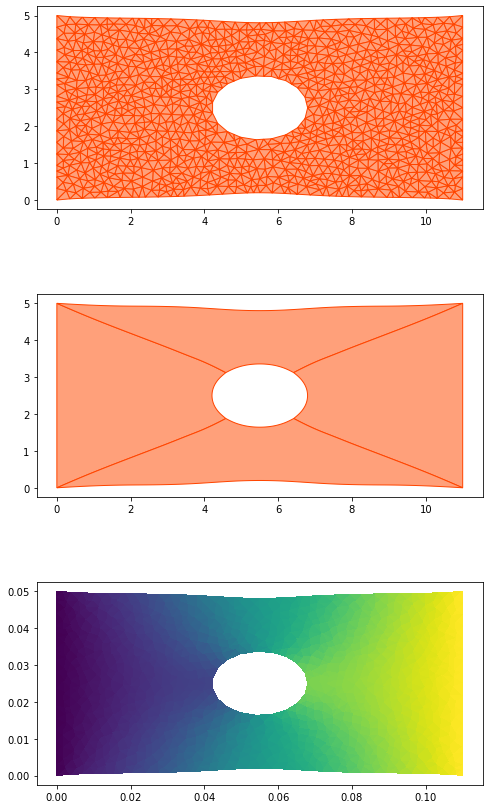

In [7]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(8, 15)

ax[0].set_aspect('equal')
plot_ctrl(ax[0], vfem_dict['element'], vfem_dict['def_ctrl'])

ax[1].set_aspect('equal')
plot_ctrl(ax[1], viga_dict['element'], viga_dict['def_ctrl'])

ax[2].set_aspect('equal')
plt.sca(ax[2])
fe.plot(fenics_dict['u'], mode='displacement')

# Compare deformations at various points on domain

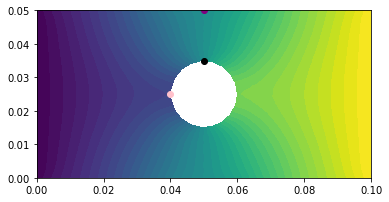

In [21]:
top_of_circle = np.array([5.0, 3.5])
side_of_circle = np.array([4.0, 2.5])
top_of_slab = np.array([5.0, 5.0])

fe.plot(fenics_dict['u'].sub(0))
ax = plt.gca()
ax.scatter(top_of_circle[0] / 100, top_of_circle[1] / 100, c='black')
ax.scatter(side_of_circle[0] / 100, side_of_circle[1] / 100, c='pink')
ax.scatter(top_of_slab[0] / 100, top_of_slab[1] / 100, c='purple')

In [22]:
print('Comparing top of circle:')
fenics_def = fenics_dict['deformation_at'](top_of_circle / 100) * 100
print('\tFENiCS deformation: ', fenics_def)
vfem_def = vfem_dict['deformation_at'](top_of_circle)
print('\tVarmint FEM deformation: ', vfem_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - vfem_def) / np.linalg.norm(fenics_def) * 100)
viga_def = viga_dict['deformation_at'](top_of_circle)
print('\tVarmint IGA deformation: ', viga_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - viga_def) / np.linalg.norm(fenics_def) * 100)

print('Comparing side of circle:')
fenics_def = fenics_dict['deformation_at'](side_of_circle / 100) * 100
print('\tFENiCS deformation: ', fenics_def)
vfem_def = vfem_dict['deformation_at'](side_of_circle)
print('\tVarmint FEM deformation: ', vfem_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - vfem_def) / np.linalg.norm(fenics_def) * 100)
viga_def = viga_dict['deformation_at'](side_of_circle)
print('\tVarmint IGA deformation: ', viga_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - viga_def) / np.linalg.norm(fenics_def) * 100)

print('Comparing top of slab:')
fenics_def = fenics_dict['deformation_at'](top_of_slab / 100) * 100
print('\tFENiCS deformation: ', fenics_def)
vfem_def = vfem_dict['deformation_at'](top_of_slab)
print('\tVarmint FEM deformation: ', vfem_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - vfem_def) / np.linalg.norm(fenics_def) * 100)
viga_def = viga_dict['deformation_at'](top_of_slab)
print('\tVarmint IGA deformation: ', viga_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - viga_def) / np.linalg.norm(fenics_def) * 100)


Comparing top of circle:
	FENiCS deformation:  [ 0.47217662 -0.133563  ]
	Varmint FEM deformation:  [ 0.47673064 -0.13401233]  % error from FEnICS:  0.9325653956834474
	Varmint IGA deformation:  [ 0.4723013  -0.13798021]  % error from FEnICS:  0.9005363003400024
Comparing side of circle:
	FENiCS deformation:  [0.19815114 0.00057059]
	Varmint FEM deformation:  [ 0.1992192  -0.00349468]  % error from FEnICS:  2.121216907977185
	Varmint IGA deformation:  [0.19943545 0.00998018]  % error from FEnICS:  4.792702503942216
Comparing top of slab:
	FENiCS deformation:  [ 0.499965   -0.19723613]
	Varmint FEM deformation:  [ 0.49985739 -0.19642893]  % error from FEnICS:  0.15151690475594792
	Varmint IGA deformation:  [ 0.4616138 -0.1971376]  % error from FEnICS:  7.135613239422183
